# Actividad 1: Trabajando con Bags
1. Crea un Dask Bag a partir de una lista de diccionarios
2. Realiza una serie de transformaciones en el Bag, como mapeo, filtrado y agregación.
3. Muestra el resultado final y explora su estructura.

Primero que nada debemos importar la libreria de Dask **"bag"** esto se hace de la siguiente manera:

In [1]:
import dask.bag as db
import graphviz

Ahora podemos crear un diccionario normal en python en mi caso creare un **diccionario** con 5 elementos con id nombre y nota

In [2]:
diccionario =[
    {'id':1,'nombre':'Juanito','nota':45},
    {'id':2,'nombre':'Cristiansito','nota':44},
    {'id':3,'nombre':'Cesarito','nota':45},
    {'id':4,'nombre':'Felipito','nota':39},
    {'id':5,'nombre':'Andresito','nota':44},
]

Aqui es donde creamos el dask bag a partir del diccionario utilizando _**dask.bag.from_sequence**_

In [3]:
bag_con_diccionario = db.from_sequence(diccionario)

Vizualizamos como quedaron las bag, con el diccionario.

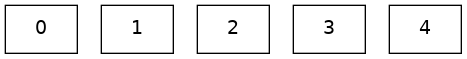

In [4]:
bag_con_diccionario.visualize(filename='dask.png')

Ahora podemos aplicarle las transformaciones vamos a ocupar **filter** primero, nos mostrará el nombre aquellos que tiene nota mayor a 40.

In [5]:
resultados = bag_con_diccionario.filter(lambda x: x['nota']>40).pluck('nombre').compute()

Vemos los resultados.

In [6]:
print(resultados)

['Juanito', 'Cristiansito', 'Cesarito', 'Andresito']


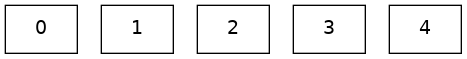

In [7]:
bag_con_diccionario.visualize(filename='dask2.png')  

Para usar **map**, vamos hacer que a todos se les sume 5 puntos.

In [8]:
resultados = bag_con_diccionario.map(lambda x: x['nota']+5).compute()

In [9]:
print(resultados)

[50, 49, 50, 44, 49]


Este es el ultima parte donde realizaremos la **agregación**, lastimosamente me genera un error de 'TypeError: unsupported operand type(s) for +: 'dict' and 'int' ' que no supe como solucionar.

In [11]:
def suma_acumulativa(acumulador, diccionarios):
     return acumulador + diccionarios['nota']

In [12]:
resultado_agregado = bag_con_diccionario.fold(suma_acumulativa)

In [13]:
resultado_final = resultado_agregado.compute()

TypeError: unsupported operand type(s) for +: 'dict' and 'int'

Traceback
---------
  File "/usr/local/lib/python3.8/site-packages/dask/local.py", line 224, in execute_task
    result = _execute_task(task, data)
  File "/usr/local/lib/python3.8/site-packages/dask/core.py", line 119, in _execute_task
    return func(*(_execute_task(a, cache) for a in args))
  File "/usr/local/lib/python3.8/site-packages/dask/bag/core.py", line 2498, in empty_safe_aggregate
    return empty_safe_apply(func, parts2, is_last)
  File "/usr/local/lib/python3.8/site-packages/dask/bag/core.py", line 2489, in empty_safe_apply
    return func(part)
  File "/usr/local/lib/python3.8/site-packages/toolz/functoolz.py", line 304, in __call__
    return self._partial(*args, **kwargs)
  File "/tmp/ipykernel_328/2781502800.py", line 2, in suma_acumulativa


In [ ]:
print(resultado_final)